## Data Incubator Challenge Part 2 - Code

The following extends the exploration that was submitted as part of the data incubator challenge. It explores other sources of data and expands the possibilities for the project.

In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
%matplotlib inline

In [3]:
import nltk
#download stop words. to be used for filtering medical terms
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/agamino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#Stop words to filter 
stop_words = set(stopwords.words('english'))

In [5]:
#Source: https://github.com/glutanimate/wordlist-medicalterms-en
#Load medical terms, this will be use to filter out everything else
medical_terms = set(line.strip() for line in open('medical_terms.txt'))

In [6]:
#Read file with all hospital addresses and urls
#Source: Homeland Infrastructure Foundation - Level Data
#https://respond-irma-geoplatform.opendata.arcgis.com/datasets/hospitals/geoservice
df_addresses = pd.read_excel("hospital_with_addresses.xlsx")

In [7]:
#Check size
df_addresses.shape

(7030, 38)

In [8]:
#Check how many terms were loaded
len(medical_terms)

98112

In [9]:
#Read text scraped from 4,016 hospital sites main pages
df_text = pd.read_excel("extracted_text_from_main_pages.xlsx")

In [55]:
df_text.shape

(4016, 4)

In [10]:
df_text.head()

,text,url
0,"""Contact Us | Directions | Hospital News Miss...",acadianmedicalcenter.com
1,"""AMG J\nSPECIALTY HOSPITAL HOME ABOUTUS PATIE...",amglafayette.com
2,"""Home | Contact | Privacy Practices\nType you...",anadarkohospital.com
3,"""Anchor\nHospital\nA Campus of Southern Cresc...",anchorhospital.com
4,"""DONATE NOW\nA ROSIE PLACE\nFOR CHILDREN\nHOM...",arosieplace.org


In [11]:
#function to extract medical terms from text
def only_medical_terms_text(text):
    text = text.replace('"','')
    tokens = text.split(" ")
    results = set()
    for t in tokens:
        if(t in medical_terms and t not in stop_words):
            results.add(t)
    return results

In [12]:
#Add a column from urls to extract medical terms
df_text['terms'] = df_text['text'].apply(only_medical_terms_text)

In [13]:
df_text.shape

(4016, 3)

In [14]:
df_text.head()

,text,url,terms
0,"""Contact Us | Directions | Hospital News Miss...",acadianmedicalcenter.com,"{age, cancerous, THE, special, curable, St., s..."
1,"""AMG J\nSPECIALTY HOSPITAL HOME ABOUTUS PATIE...",amglafayette.com,"{level, therapeutic, Louisiana, complex, famil..."
2,"""Home | Contact | Privacy Practices\nType you...",anadarkohospital.com,"{great, State, high, care, time, learn, medica..."
3,"""Anchor\nHospital\nA Campus of Southern Cresc...",anchorhospital.com,"{behavioral, two, International, Call, Souther..."
4,"""DONATE NOW\nA ROSIE PLACE\nFOR CHILDREN\nHOM...",arosieplace.org,"{variety, children, relief, licensed, supporti..."


In [15]:
#Drop were no terms were found
df_text.dropna(inplace=True)

In [16]:
#Calculatd number of terms
df_text['number_of_terms'] = df_text.terms.apply(lambda x: len(x))

In [17]:
df_text.head()

,text,url,terms,number_of_terms
0,"""Contact Us | Directions | Hospital News Miss...",acadianmedicalcenter.com,"{age, cancerous, THE, special, curable, St., s...",13
1,"""AMG J\nSPECIALTY HOSPITAL HOME ABOUTUS PATIE...",amglafayette.com,"{level, therapeutic, Louisiana, complex, famil...",16
2,"""Home | Contact | Privacy Practices\nType you...",anadarkohospital.com,"{great, State, high, care, time, learn, medica...",19
3,"""Anchor\nHospital\nA Campus of Southern Cresc...",anchorhospital.com,"{behavioral, two, International, Call, Souther...",16
4,"""DONATE NOW\nA ROSIE PLACE\nFOR CHILDREN\nHOM...",arosieplace.org,"{variety, children, relief, licensed, supporti...",18


In [18]:
#extract only most important columns from addresses dataframe
df_addresses_cleaned = df_addresses[['url', 'NAME', 'ADDRESS', 'CITY','STATE', 'ZIP', 'POPULATION',
       'COUNTY', 'COUNTYFIPS', 'LATITUDE', 'LONGITUDE','NAICS_CODE', 'NAICS_DESC', 'SOURCE','VAL_DATE', 'WEBSITE', 'STATE_ID', 'ST_FIPS', 'OWNER',
       'BEDS']]

In [19]:
df_addresses_cleaned.shape

(7030, 20)

In [20]:
#drop duplicate urls (some hospitals have same URL when they have different location)
df_addresses_cleaned.drop_duplicates(['url'], keep='first', inplace=True)

/Users/agamino/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
df_addresses_cleaned.shape

(4674, 20)

In [22]:
#Create one file merging terms and hospital information
#Merge terms and addresses
df_merged = pd.merge(df_text, df_addresses_cleaned, on="url")

In [23]:
df_merged.head(10)

,text,url,terms,number_of_terms,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,...,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,VAL_DATE,WEBSITE,STATE_ID,ST_FIPS,OWNER,BEDS
0,"""Contact Us | Directions | Hospital News Miss...",acadianmedicalcenter.com,"{age, cancerous, THE, special, curable, St., s...",13,Acadian Medical Center (A Campus Of Mercy Regi...,3501 Highway 190,Eunice,LA,70535,109,...,-92.3862,622210,General Medical And Surgical Hospitals,http://new.dhh.louisiana.gov/index.cfm/directo...,2014-02-10T00:00:00.000Z,http://acadianmedicalcenter.com/,Not Available,22,Proprietary,109
1,"""AMG J\nSPECIALTY HOSPITAL HOME ABOUTUS PATIE...",amglafayette.com,"{level, therapeutic, Louisiana, complex, famil...",16,AMG Specialty Hospital-Lafayette,310 Youngsville Hwy,Lafayette,LA,70508,58,...,-91.9922,622210,General Medical And Surgical Hospitals,http://new.dhh.louisiana.gov/index.cfm/directo...,2014-02-10T00:00:00.000Z,http://amglafayette.com/,Not Available,22,Proprietary,58
2,"""Home | Contact | Privacy Practices\nType you...",anadarkohospital.com,"{great, State, high, care, time, learn, medica...",19,The Physicians' Hospital In Anadarko,1002 Central Boulevard East,Anadarko,OK,73005,25,...,-98.2283,622210,General Medical And Surgical Hospitals,http://www.ok.gov/health/documents/MF%20Facili...,2014-02-05T00:00:00.000Z,http://anadarkohospital.com,Not Available,40,Proprietary,25
3,"""Anchor\nHospital\nA Campus of Southern Cresc...",anchorhospital.com,"{behavioral, two, International, Call, Souther...",16,Anchor Behavioral Health System,5454 Yorktowne Drive,College Park,GA,30349,122,...,-84.4523,622210,General Medical And Surgical Hospitals,Georgia Department of Public Health,2014-02-10T00:00:00.000Z,http://anchorhospital.com/,72,13,Non-profit,122
4,"""DONATE NOW\nA ROSIE PLACE\nFOR CHILDREN\nHOM...",arosieplace.org,"{variety, children, relief, licensed, supporti...",18,A Rosie Place,53131 Quince Rd,South Bend,IN,46628,0,...,-86.3815,622210,General Medical And Surgical Hospitals,http://www.state.in.us/isdh/reports/QAMIS/hosd...,2014-02-10T00:00:00.000Z,http://arosieplace.org/index.php,12-012157-1,18,Non-profit,0
5,"""About Us Careers Contact UsDirections\nFind ...",augustasurgicalcenter.com,"{licensed, ambulatory, Call, close, complexes,...",23,Augusta Surgical Center,915 Russell Street,Augusta,GA,30904,0,...,-82.0061,622210,General Medical And Surgical Hospitals,Georgia Department of Public Health,2013-10-16T00:00:00.000Z,http://augustasurgicalcenter.com/,137,13,Proprietary,0
6,"""Baptist Health\nBaptist Health\nOur Services...",baptisthealth.net,"{source, TYPES, virtual, South, West, World, e...",19,Mariners Hospital,91500 Overseas Hwy,Tavernier,FL,33070,25,...,-80.5223,622210,General Medical And Surgical Hospitals,http://www.fgdl.org/metadataexplorer/explorer.jsp,2014-02-10T00:00:00.000Z,http://baptisthealth.net/en/facilities/mariner...,9958,12,Non-profit,25
7,"""Patients&VisitorsCareersServices\nContact Us...",bayviewbehavioralhospital.com,"{issue, South, Gulf, transition, Coast, qualit...",24,Bayview Behavioral Hospital,6629 Wooldridge,Corpus Christi,TX,78414,68,...,-97.3604,622210,"Hospitals, psychiatric (except convalescent)",http://www.dshs.state.tx.us/chs/hosp/hosp2.shtm,2014-02-10T00:00:00.000Z,http://bayviewbehavioralhospital.com/contact-us/,Not Available,48,Proprietary,68
8,"""Site search\ngo\nWe Treat You Like Famdly\nS...",bcmedsvcs.com,"{nursing, pedometer, small, complex, full, pro...",20,Ed Fraser Memorial Hospital,159 N 3Rd St,Macclenny,FL,32063,68,...,-82.1193,622210,General Medical And Surgical Hospitals,http://www.fgdl.org/metadataexplorer/explorer.jsp,2014-02-10T00:00:00.000Z,http://bcmedsvcs.com,9937,12,Non-profit,68
9,"""BEACON\nCHILDREN\'S\nHOSPITAL\nAbout US\nymp...",beaconchildrenshospital.com,"{families, staff, treatment, con, safe, inspir...",23,Beacon Children's Hospital,150 Hospital Drive,Luverne,AL,36049,24,...,-86.2632,622210,"Hospitals, Psychiatric (Except Convalescent)",http://ph.state.al.us/facilitiesdirectory/%

In [24]:
#extract states and terms to do some calculations
df_states_terms = df_merged[['STATE','terms','number_of_terms']]

In [25]:
df_states_terms.shape

(3814, 3)

In [26]:
#Collect terms and group by state
state_terms = {}

In [27]:
for index, row in df_states_terms.iterrows():
    state = row['STATE']
    terms = list(row['terms'])
    if(state in state_terms):
        state_terms[state].update(terms)
    else:
        state_terms[state] = Counter(terms)
        
        

In [28]:
#Show California most frequent terms
state_terms['CA'].most_common(20)

[('Health', 165),
 ('care', 135),
 ('medical', 85),
 ('hospital', 77),
 ('one', 67),
 ('San', 54),
 ('heart', 52),
 ('information', 50),
 ('quality', 45),
 ('Valley', 44),
 ('right', 41),
 ('make', 39),
 ('staff', 36),
 ('treatment', 35),
 ('first', 33),
 ('get', 33),
 ('committed', 33),
 ('time', 32),
 ('acute', 30),
 ('part', 29)]

In [29]:
#create text based on frequency of top words
most_common_words_str = ""
for word in state_terms['CA'].most_common(100):
    most_common_words_str += str(word[0]+" ")*word[1]

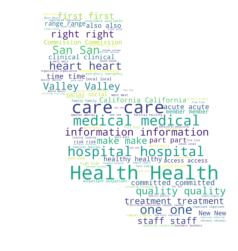

In [30]:
#Draw a wordcloud based on frequent terms for the state of California
#Source: http://clipart-library.com/clipart/pcodoqRRi.htm
california_outline = np.array(Image.open("state_of_california_blue.gif"))
wordcloud = WordCloud(background_color="white",width=1200, height=800,prefer_horizontal=1,mask=california_outline, random_state=42).generate(most_common_words_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('california_word_cloud_using_vision_cloud_text.png')

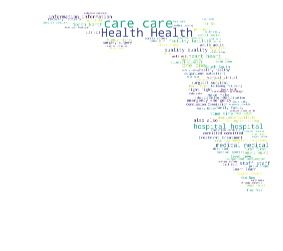

In [31]:
#Draw a wordcloud based on frequent terms for the state of Florida
most_commonfl_words_str = ""
for word in state_terms['FL'].most_common(100):
    most_commonfl_words_str += str(word[0]+" ")*word[1]

florida_outline = np.array(Image.open("florida_outline_v2.png"))
wordcloud = WordCloud(background_color="white",width=1200, height=800,prefer_horizontal=1,mask=florida_outline, random_state=42).generate(most_commonfl_words_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('florida_word_cloud_using_vision_cloud_text.png')

In [32]:
# Compute the correlation matrix, to see if there are any interesting ones
corr = df_merged.corr()

In [33]:
corr

,number_of_terms,ZIP,POPULATION,COUNTYFIPS,LATITUDE,LONGITUDE,NAICS_CODE,ST_FIPS,BEDS
number_of_terms,1.000000,0.008629,-0.028395,0.003544,-0.015714,0.002322,0.058890,0.003507,-0.028395
ZIP,0.008629,1.000000,-0.119898,-0.176003,-0.162153,-0.861598,0.002112,-0.176917,-0.119898
POPULATION,-0.028395,-0.119898,1.000000,-0.014104,-0.070066,0.105254,-0.099685,-0.014017,1.000000
COUNTYFIPS,0.003544,-0.176003,-0.014104,1.000000,0.128633,0.259547,0.123522,0.999980,-0.014104
LATITUDE,-0.015714,-0.162153,-0.070066,0.128633,1.000000,0.054191,-0.026632,0.129972,-0.070066
LONGITUDE,0.002322,-0.861598,0.105254,0.259547,0.054191,1.000000,0.020340,0.259843,0.105254
NAICS_CODE,0.058890,0.002112,-0.099685,0.123522,-0.026632,0.020340,1.000000,0.123223,-0.099685
ST_FIPS,0.003507,-0.176917,-0.014017,0.999980,0.129972,0.259843,0.123223,1.000000,-0.014017
BEDS,-0.028395,-0.119898,1.000000,-0.014104,-0.070066,0.105254,-0.099685,-0.014017,1.000000


In [34]:
#Extract state, NAICS, and terms
df_state_naics_terms = df_merged[["STATE", "NAICS_DESC","number_of_terms"]]

In [35]:
df_state_naics_terms.head()

,STATE,NAICS_DESC,number_of_terms
0,LA,General Medical And Surgical Hospitals,13
1,LA,General Medical And Surgical Hospitals,16
2,OK,General Medical And Surgical Hospitals,19
3,GA,General Medical And Surgical Hospitals,16
4,IN,General Medical And Surgical Hospitals,18


In [36]:
#group by domain and concatenate terms
df_grouped_by_state = df_state_naics_terms.groupby(['STATE','NAICS_DESC']).apply(lambda x: x.sum())

In [37]:
#rename index from domain to url
#remove extra 'domain' column
df_grouped_by_state.index.names = ['state_key','naics_key']
df_grouped_by_state.drop('STATE', axis=1, inplace=True)

In [38]:
df_grouped_by_state.drop('NAICS_DESC', axis=1, inplace=True)

In [39]:
df_grouped_by_state.head()

number_of_terms
state_key naics_key                                                          
AK        General Medical And Surgical Hospitals                           35
AL        Children'S Hospitals, General                                    10
          General Medical And Surgical Hospitals                          811
          Hospitals, Psychiatric (Except Convalescent)                    118
          Rehabilitation Hospitals (Except Alcoholism, Dr...              105

In [40]:
#reset index
df_grouped_by_state.reset_index(drop=False, inplace=True)

In [41]:
df_grouped_by_state.head()

,state_key,naics_key,number_of_terms
0,AK,General Medical And Surgical Hospitals,35
1,AL,"Children'S Hospitals, General",10
2,AL,General Medical And Surgical Hospitals,811
3,AL,"Hospitals, Psychiatric (Except Convalescent)",118
4,AL,"Rehabilitation Hospitals (Except Alcoholism, D...",105


In [42]:
#Plot by state, type of hoslital (NAICS) and number of unique terms
sns.set()

# Load the pivot needed for heatmap
heatmap_data = df_grouped_by_state.pivot("state_key", "naics_key","number_of_terms")



In [43]:
heatmap_data.fillna(0, inplace=True)
# heatmap_data.naics_key = heatmap_data.naics_key.astype(int)

In [44]:
type(heatmap_data)

pandas.core.frame.DataFrame

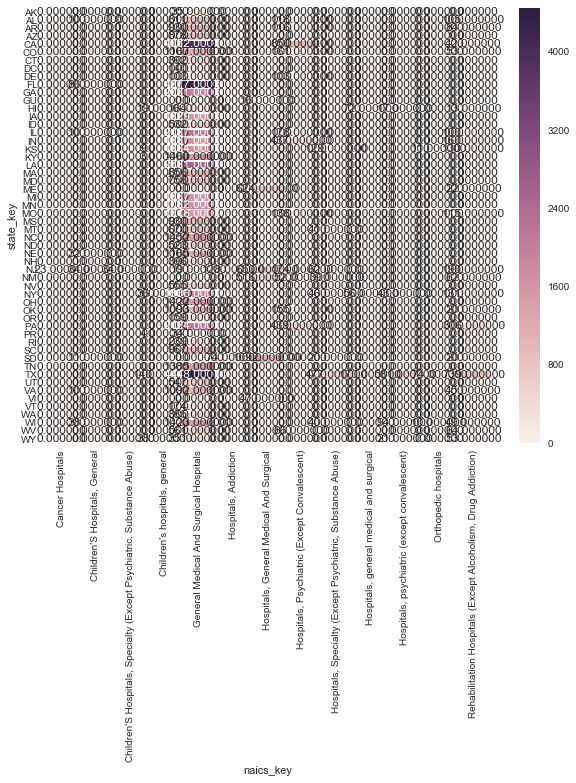

In [45]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="f", linewidths=.5, ax=ax)

In [46]:
df_merged.head()

,text,url,terms,number_of_terms,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,...,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,VAL_DATE,WEBSITE,STATE_ID,ST_FIPS,OWNER,BEDS
0,"""Contact Us | Directions | Hospital News Miss...",acadianmedicalcenter.com,"{age, cancerous, THE, special, curable, St., s...",13,Acadian Medical Center (A Campus Of Mercy Regi...,3501 Highway 190,Eunice,LA,70535,109,...,-92.3862,622210,General Medical And Surgical Hospitals,http://new.dhh.louisiana.gov/index.cfm/directo...,2014-02-10T00:00:00.000Z,http://acadianmedicalcenter.com/,Not Available,22,Proprietary,109
1,"""AMG J\nSPECIALTY HOSPITAL HOME ABOUTUS PATIE...",amglafayette.com,"{level, therapeutic, Louisiana, complex, famil...",16,AMG Specialty Hospital-Lafayette,310 Youngsville Hwy,Lafayette,LA,70508,58,...,-91.9922,622210,General Medical And Surgical Hospitals,http://new.dhh.louisiana.gov/index.cfm/directo...,2014-02-10T00:00:00.000Z,http://amglafayette.com/,Not Available,22,Proprietary,58
2,"""Home | Contact | Privacy Practices\nType you...",anadarkohospital.com,"{great, State, high, care, time, learn, medica...",19,The Physicians' Hospital In Anadarko,1002 Central Boulevard East,Anadarko,OK,73005,25,...,-98.2283,622210,General Medical And Surgical Hospitals,http://www.ok.gov/health/documents/MF%20Facili...,2014-02-05T00:00:00.000Z,http://anadarkohospital.com,Not Available,40,Proprietary,25
3,"""Anchor\nHospital\nA Campus of Southern Cresc...",anchorhospital.com,"{behavioral, two, International, Call, Souther...",16,Anchor Behavioral Health System,5454 Yorktowne Drive,College Park,GA,30349,122,...,-84.4523,622210,General Medical And Surgical Hospitals,Georgia Department of Public Health,2014-02-10T00:00:00.000Z,http://anchorhospital.com/,72,13,Non-profit,122
4,"""DONATE NOW\nA ROSIE PLACE\nFOR CHILDREN\nHOM...",arosieplace.org,"{variety, children, relief, licensed, supporti...",18,A Rosie Place,53131 Quince Rd,South Bend,IN,46628,0,...,-86.3815,622210,General Medical And Surgical Hospitals,http://www.state.in.us/isdh/reports/QAMIS/hosd...,2014-02-10T00:00:00.000Z,http://arosieplace.org/index.php,12-012157-1,18,Non-profit,0


In [47]:
#Convert set items into str to search with contains
df_merged['terms_tx'] = df_merged['terms'].apply(str)

In [59]:
df_merged.shape

(3814, 24)

In [48]:
#Extract those hospital where 'cancer' was found
df_hospitals_with_term_cancer = df_merged[df_merged['terms_tx'].str.contains('cancer')]

In [56]:
df_hospitals_with_term_cancer.shape

(199, 24)

In [49]:
df_hospitals_with_term_cancer.head()

,text,url,terms,number_of_terms,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,...,NAICS_CODE,NAICS_DESC,SOURCE,VAL_DATE,WEBSITE,STATE_ID,ST_FIPS,OWNER,BEDS,terms_tx
0,"""Contact Us | Directions | Hospital News Miss...",acadianmedicalcenter.com,"{age, cancerous, THE, special, curable, St., s...",13,Acadian Medical Center (A Campus Of Mercy Regi...,3501 Highway 190,Eunice,LA,70535,109,...,622210,General Medical And Surgical Hospitals,http://new.dhh.louisiana.gov/index.cfm/directo...,2014-02-10T00:00:00.000Z,http://acadianmedicalcenter.com/,Not Available,22,Proprietary,109,"{'age', 'cancerous', 'THE', 'special', 'curabl..."
24,"""Take the Health Needs Survey Pay My Bill\nDi...",charlesregional.org,"{heard, order, Methodist, use, compliance, eme...",54,Civista Medical Center,5 Garrett Avenue,La Plata,MD,20646,124,...,622210,General Medical And Surgical Hospitals,http://dhmh.maryland.gov/ohcq/docs/Forms/DispF...,2014-02-10T00:00:00.000Z,http://charlesregional.org/,Not Available,24,Non-profit,124,"{'heard', 'order', 'Methodist', 'use', 'compli..."
59,"""Dignity Health\nFIND A DOCTOR\nOUR LOCATIONS...",hospitals.dignityhealth.org,"{matter, birth, gain, one, date, clinical, mem...",38,St Josephs Hospital,45 W 10Th Street,St Paul,MN,55102,401,...,622210,General Medical And Surgical Hospitals,http://www.health.state.mn.us/divs/fpc/directo...,2014-02-10T00:00:00.000Z,https://hospitals.dignityhealth.org/stjosephs/...,524,27,Non-profit,401,"{'matter', 'birth', 'gain', 'one', 'date', 'cl..."
74,"""PHS.org\nmyPRES\nFind a Doctor\nSEARCH\nPRES...",kaseman-hospital.phs.org,"{wide, behavioral, adult, visiting, satellite,...",16,Presbyterian Kaseman Hospital,8300 Constitution Avenue Northeast,Albuquerque,NM,87110,170,...,622210,"Hospitals, General Medical And Surgical",http://www.health.state.nm.us/facilities.shtml,2014-02-10T00:00:00.000Z,https://kaseman-hospital.phs.org/Pages/default...,Not Available,35,Non-profit,170,"{'wide', 'behavioral', 'adult', 'visiting', 's..."
99,"""MEDICAL CENTER OF\nO Average ER Wait Time\nM...",medicalcentertrinity.com,"{one, West, disease, PCI, treatment, four, saf...",35,Medical Center of Trinity,9330 Sr 54,Trinity,FL,34655,292,...,622210,General Medical And Surgical Hospitals,http://www.fgdl.org/metadataexplorer/explorer.jsp,2013-11-06T00:00:00.000Z,http://medicalcentertrinity.com,9982,12,Proprietary,292,"{'one', 'West', 'disease', 'PCI', 'treatment',..."


In [63]:
#Show Value counts for hospitals types
df_merged['OWNER'].value_counts()

Non-profit                         1848
Proprietary                        1162
Government - District/Authority     357
Government - Local                  354
Government - State                   55
Not Available                        32
Government - Federal                  6
Name: OWNER, dtype: int64

In [58]:
#Show Value counts for hospitals that contained term cancer
df_hospitals_with_term_cancer['OWNER'].value_counts()

Non-profit                         126
Proprietary                         44
Government - District/Authority     17
Government - Local                   8
Government - State                   4
Name: OWNER, dtype: int64

In [57]:
df_hospitals_with_term_cancer[['CITY','LATITUDE','LONGITUDE','BEDS']]

,CITY,LATITUDE,LONGITUDE,BEDS
0,Eunice,30.4966,-92.3862,109
24,La Plata,38.5293,-76.9723,124
59,St Paul,44.9486,-93.0999,401
74,Albuquerque,35.0930,-106.5530,170
99,Trinity,28.2039,-82.6601,292
138,Lebanon,43.6426,-72.2532,353
140,Cuthbert,31.7755,-84.7941,105
148,Albuquerque,35.0816,-106.6350,453
169,San Antonio,29.5082,-98.5724,1763
188,Saint Petersburg,27.7786,-82.6505,395


In [50]:
df_hospitals_with_term_cancer[['CITY','LATITUDE','LONGITUDE']]

,CITY,LATITUDE,LONGITUDE
0,Eunice,30.4966,-92.3862
24,La Plata,38.5293,-76.9723
59,St Paul,44.9486,-93.0999
74,Albuquerque,35.0930,-106.5530
99,Trinity,28.2039,-82.6601
138,Lebanon,43.6426,-72.2532
140,Cuthbert,31.7755,-84.7941
148,Albuquerque,35.0816,-106.6350
169,San Antonio,29.5082,-98.5724
188,Saint Petersburg,27.7786,-82.6505


In [51]:
#Get longitude and latitude of cities which hospital that were
#found to have term
cities_location = []
for index, row in df_hospitals_with_term_cancer.iterrows():
    cities_location.append((row['LONGITUDE'], row['LATITUDE'],row['CITY']))

In [52]:
#Create list of hospitals in cities that match
#the search record "Cancer" 
#Use this to determine the size of the marker on map
cities_counter = Counter()

for city in df_hospitals_with_term_cancer['CITY']:
    cities_counter.update([city])


In [53]:
cities_counter['Chicago']

1

/Users/agamino/anaconda/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/agamino/anaconda/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


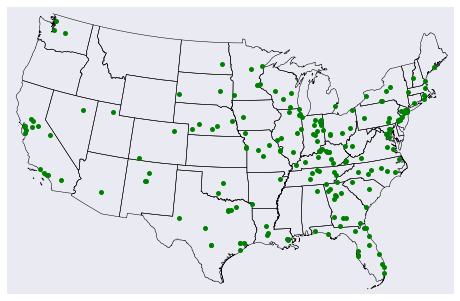

In [54]:
#Draw map of cities with hospitals where term 'cancer' was found
scale = 5

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile of the US
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()

count = 1
for (longitude,latitude,city) in cities_location:
    x, y = map(longitude, latitude)
    #Get number of hospitals in that city 
    count = cities_counter[city]
    map.plot(x,y,marker='o',color='Green',markersize=int(math.sqrt(count))*scale)
plt.show()
plt.savefig('cities_with_cancer_facilities.png')